In [3]:
from bs4 import BeautifulSoup as bs
from requests import get
import time

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


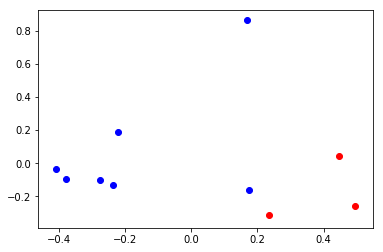

In [4]:
url_list = ["https://genius.com/Eminem-beautiful-lyrics", "https://genius.com/Eminem-venom-music-from-the-motion-picture-lyrics",
			"https://genius.com/Eminem-mockingbird-lyrics", "https://genius.com/Eminem-not-afraid-lyrics",
			"https://genius.com/Eminem-my-name-is-lyrics", "https://genius.com/Eminem-cleanin-out-my-closet-lyrics",
			"https://genius.com/Queen-bohemian-rhapsody-lyrics", "https://genius.com/Queen-the-show-must-go-on-lyrics",
			"https://genius.com/Queen-we-are-the-champions-lyrics", "https://genius.com/Queen-we-will-rock-you-lyrics"]

url_list = list(set(url_list))

texts_list = []
for url in url_list:
	response = get(url)
	soup = bs(response.text)
	soup = soup.find("div", {"class" : "song_body-lyrics"}).text
	texts_list.append(soup)
	time.sleep(3)


stop_words = stopwords.words('english')

texts_list = np.char.lower(texts_list)
n_texts_list = []
for text in texts_list:
	n_text = ""
	for word in text.split():
	    if word not in stop_words:
	        n_text = n_text + " " + word
	n_texts_list.append(n_text)


symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
cleaned_text = []
for text in n_texts_list:
	for i in symbols:
	    text = text.replace(i, ' ')
	cleaned_text.append(text)

num_clusters = 2
max_iterations = 500
cmap = {
    0: 'blue', 1: 'red'
}
num_pc = 2



tf_idf = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(1, 3))
tf_idf_data = tf_idf.fit_transform(cleaned_text)


k_kmeans = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1,
    random_state = 42,
    algorithm = "full"
)

labels = k_kmeans.fit_predict(tf_idf_data)

data = tf_idf_data.todense()



pc = PCA(n_components=num_pc).fit_transform(data)

fig, ax = plt.subplots()
for index, instance in enumerate(pc):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = pc[index]
    color = cmap[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)

plt.show()